In [1]:
import pandas as pd

# Load the dataset
file_path = "/content/Final Cleaning Data(1).csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
df.head()

,Unnamed: 0.1,Unnamed: 0,kdrama_id,drama_name,year,director,screenwriter,country,type,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop
0,0,0,661d4193916c4e71a2c70473ab11e9e8,Sing My Crush,2023,['So Joon Moon'],Others,South Korea,Drama,8,1500,8/2/2023,8/2/2023,Wednesday,Others,Not Yet Rated,Follow the story of acquaintances Ba Ram and H...,1484,2238
1,1,1,5ffcbeaa17114714af1959129984274c,D.P. Season 2,2023,Others,['Kim Bo Tong'],South Korea,Drama,6,3000,7/28/2023,7/28/2023,Friday,Netflix,15+ - Teens 15 or older,This unfolding story ensues when military dese...,164,1084
2,2,2,65075cb9c1a54be4a441cee6f16c9fdf,Shadow Detective Season 2,2023,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",South Korea,Drama,8,3300,7/5/2023,7/26/2023,Wednesday,Disney+ Hulu,15+ - Teens 15 or older,Unfolds the ultimate counterattack of veteran ...,2443,6915
3,3,4,04c1fe41948e464fb440001831d74d41,Celebrity,2023,['Kim Chul Gyu'],['Kim Yi Young'],South Korea,Drama,12,2700,6/30/2023,6/30/2023,Friday,Netflix,18+ Restricted (violence & profanity),Fame. Money. Power. One young woman fights to ...,826,547
4,4,5,2e06f3f0c28942fd8b8e4780f5e666dc,Blue Temperature,2023,Others,Others,South Korea,Drama,4,420,6/28/2023,7/19/2023,Wednesday,Naver TV Cast,Not Yet Rated,"Set in the picturesque town of Cheongdo, this ...",47245,15405


Intercept: 35730.71113426697
Mean Squared Error: 5086203.25711019
R-squared Score: 0.7430384106113636

Feature Coefficients:
     Feature  Coefficient
0      year   -16.078868
1   tot_eps     7.057345
2  duration    -0.631723
3      rank     0.168499


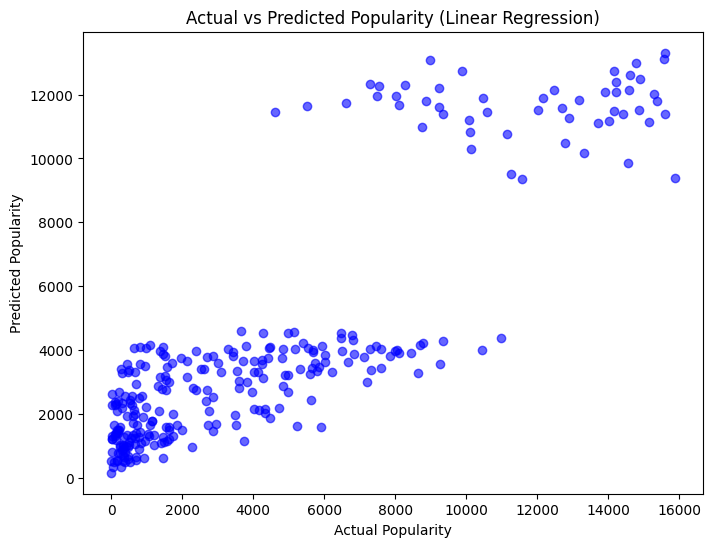

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select independent variables (X) and dependent variable (y)
X = df[['year', 'tot_eps', 'duration', 'rank']]
y = df['pop']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Display feature coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nFeature Coefficients:\n", coefficients)

# Visualizing actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity (Linear Regression)")
plt.show()

Intercept: 3948.588484913893
Mean Squared Error: 5086203.25711019
R-squared Score: 0.7430384106113636

Feature Coefficients:
     Feature  Coefficient
0      year   -38.160081
1   tot_eps   195.413427
2  duration  -929.395369
3      rank  3146.914373


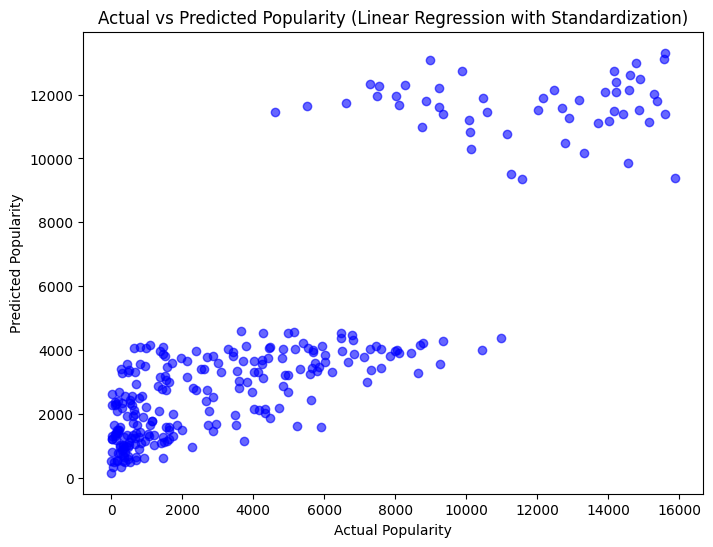

In [4]:
# With Standardization and normalization

!pip install pandas scikit-learn

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select independent variables (X) and dependent variable (y)
X = df[['year', 'tot_eps', 'duration', 'rank']]
y = df['pop']

# Standardization (Z-score Normalization)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Normalization (Min-Max Scaling)
min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X)

# Splitting the standardized data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Display feature coefficients
coefficients = pd.DataFrame({'Feature': ['year', 'tot_eps', 'duration', 'rank'], 'Coefficient': model.coef_})
print("\nFeature Coefficients:\n", coefficients)

# Visualizing actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity (Linear Regression with Standardization)")
plt.show()


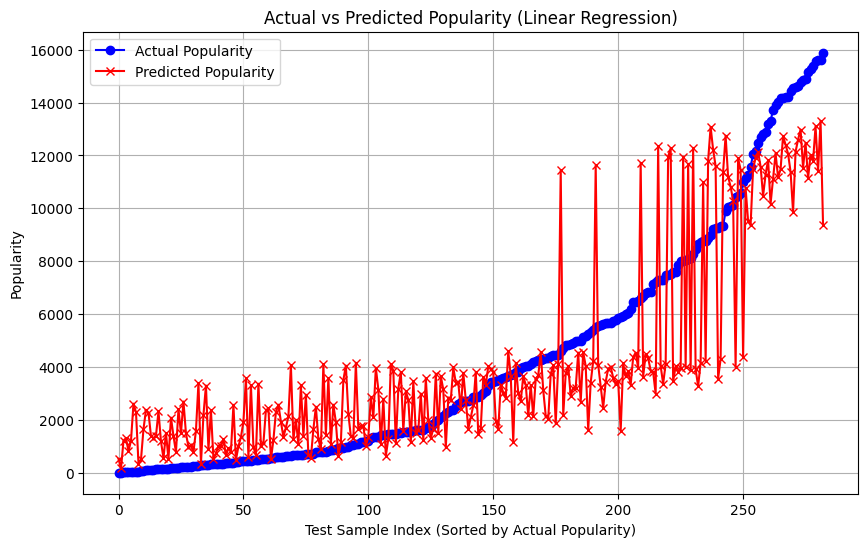

In [5]:
# Sorting values for better visualization
sorted_indices = np.argsort(y_test.values)
y_test_sorted = np.array(y_test)[sorted_indices]
y_pred_sorted = np.array(y_pred)[sorted_indices]

# Plot actual vs. predicted popularity
plt.figure(figsize=(10,6))
plt.plot(y_test_sorted, label="Actual Popularity", linestyle='-', marker='o', color='blue')
plt.plot(y_pred_sorted, label="Predicted Popularity", linestyle='-', marker='x', color='red')

# Labels and title
plt.xlabel("Test Sample Index (Sorted by Actual Popularity)")
plt.ylabel("Popularity")
plt.title("Actual vs Predicted Popularity (Linear Regression)")
plt.legend()
plt.grid()

# Show plot
plt.show()